<center>
    <img src="../imagens/logo_APL.png" width="300" alt="APL logo"  />
</center>

# Classificação: Métricas de Desempenho

**Bem vindo!** Neste material você aprenderá algumas das principais métricas de desempenho em problemas de classificação.  Usaremos a biblioteca `Scikit-Learn`, desenvolvida para aplicação prática de algoritmos de *machine learning*. Ao final, espera-se que você seja capaz de aplicar e interpretar o resuldo dessas métricas.

<h2>Conteúdo:</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li> Introdução </li>
    <li> Entendendo e Carregando o Dataset </li> 
    <li> Análise Exploratória dos Dados </li>
    <li> Regressores (Matriz de entrada) e Variável Alvo (vetor de saídas) </li>   
    <li> Dividir o Dataset: Treinamento e Validação </li>   
    <li> Algoritmo de Machine Learning </li>  
    <li> Avaliação </li>  
    <li> Visualização da Árvore de Decisão </li>
</ul>
</div>

<hr>

# Introdução

Ao longo desse material vamos detalhar algumas das principais métricas de desempenho que podem ser utilizadas em problemas de classificação. Para tanto, a avaliação de modelo se dá a partir do cálculo de diversas medidas de desempenho, permitindo que o cientista de dados interprete a qualidade do modelo e sua potencial eficácia na resolução do problema em questão.

Dentre as diversas opções de métricas de desempenho, neste módulo iremos aprender: 
- Matriz de Confusão
- Acurácia
- Precisão
- Recall
- F1 Score

Carregamento das bibliotecas:

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

## Entendendo e Carregando o Dataset

Vamos carregar nosso dataset.
O exemplo é baseado em um conjunto de dados que está publicamente disponível no [UCI Machine Learning Repository](http://mlearn.ics.uci.edu/MLRepository.html). Esse conjunto de dados consiste em centenas de registros de amostras de células humanas, contendo diversas características. Os campos em cada registro são:

| Nome        | Descrição                             |
| ----------- | ---------------------------           |
| ID          | Identificação                         |
| Clump       | espessura do aglomerado               |
| UnifSize    | Uniformidade do tamanho da célula     |
| UnifShape   | Uniformidade do formato da célula     |
| MargAdh     | Adesão marginal                       |
| SingEpiSize | Tamanho de célula epitelial única     |
| BareNuc     | Núcleos puros                         |
| BlandChrom  | Cromatina branda                      |
| NormNucl    | Nucléolos normais                     |
| Mit         | Mitoses                               |
| Class       | Benigno ou Maligno                    |


Para fins de simplificação, estamos usando um conjunto de dados que possui um número relativamente pequeno de preditores ou regressores ou *features* (no presente contexto, esses termos são equivalentes) em cada registro.


In [2]:
cell_df = pd.read_csv("https://raw.githubusercontent.com/APL-Data-Intelligence/AcelerAI/main/Curso_NEED/datasets/cellsample_dataset/cell_samples.csv")
cell_df.shape

(699, 11)

Nosso dataset possui, portanto, 699 amostras e 11 características/features.

In [3]:
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Análise Exploratória dos Dados

O campo **Class** contém o diagnóstico: se as amostras são benignas (valor = 2) ou malignas (valor = 4).

Vejamos a quantidade de cada uma dessas amostras segundo esse diagnóstico:

In [4]:
cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

O nosso dataset é composto, portanto, por 458 amostras benígnas e 241 malígnas.

Todo problema de classificação binária pode ser considerado um problema de sim/não. Aqui a questão é: este câncer é Benigno? Na variável alvo (campo **Class** contém o diagnóstico), 2 significa Sim, enquanto 4 significa Não.

### Separar as Colunas do Dataframe 
#### Regressores (Matriz de entrada) vs Variável Alvo (vetor de saídas).

Os regressores ou *features* são as variáveis explicativas do nosso dataset. Enquanto a variável alvo reflete a característica que desejamos classificar: em nosso dataset, se o câncer é benigno ou malígno.

Para essa finalidade, vamos criar um novo dataframe a partir do dataframe orignal, mas utilizando apenas as features desejadas.

In [5]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[5, 1, 1, 1, 2, 3, 1, 1],
       [5, 4, 4, 5, 7, 3, 2, 1],
       [3, 1, 1, 1, 2, 3, 1, 1],
       [6, 8, 8, 1, 3, 3, 7, 1],
       [4, 1, 1, 3, 2, 3, 1, 1]], dtype=int64)

Agora vamos criar o nosso dataframe que corresponde a variável alvo, ou seja, a variável que queremos fazer a predição.

In [6]:
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

### Dividir o Dataset: Treinamento e Validação/Teste

Uma solução bastante conhecida para minimizar esse problema é separar a base de dados em dois subconjuntos, que são mutuamente exclusivos:  um para treinamento e outro para validação/teste. 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

Vamos mostrar a dimensão desses conjuntos:

In [9]:
print ('Conjunto de treino:', X_train.shape,  y_train.shape)
print ('Conjunto de teste:', X_test.shape,  y_test.shape)

Conjunto de treino: (559, 8) (559,)
Conjunto de teste: (140, 8) (140,)


Podemos observar que nosso **conjunto de treinamento** possui 559 amostras (ou 80%), enquanto o **conjunto de avaliação** 140 amostras (ou 20%), totalizando as 699 amostras originais. 

## Algoritmo de Machine Learning

No nosso exemplo vamos usar **Support Vector Machines**, na biblioteca `sklearn.svm`. Entretanto, uma discussão mais detalhada desse algoritmo é adiada para o módulo XXXXXXXXXX

In [10]:
from sklearn import svm
# Instanciando o Estimador. 
classificador = svm.SVC()
# Treinamento - Ajustar os parâmetros do modelo a partir dos dados
classificador.fit(X_train, y_train) 
# Fazer a predição a partir de um novo comjunto de amostras:
y_pred = classificador.predict(X_test)

## Avaliação de Desempenho

Vamos mostrar os valores de nosso dataset de validação e comparar com algumas predições feitas pelo nosso modelo:

In [11]:
print("Valores reais:     ", y_test, "\n ")
print("Valores previstos: ", y_pred)

Valores reais:      [4 2 2 4 2 2 2 4 4 4 2 2 2 2 4 4 2 2 2 2 2 4 2 2 2 4 2 2 4 4 2 4 2 2 2 4 2
 4 4 2 2 4 4 2 2 2 2 2 2 2 2 4 2 2 2 2 4 4 4 4 2 2 4 4 4 2 2 2 4 2 4 4 4 2
 2 2 4 2 4 2 2 2 2 2 2 2 2 4 4 2 4 2 2 4 4 4 2 4 4 2 4 2 4 2 2 2 2 2 2 2 2
 2 2 2 2 4 4 2 2 2 4 2 4 2 2 2 4 4 2 4 2 2 2 4 2 4 2 2 4 4] 
 
Valores previstos:  [4 2 4 4 2 2 2 4 4 4 2 2 2 2 4 4 2 2 2 2 2 4 2 2 2 4 2 2 4 4 2 4 2 2 2 4 2
 4 4 2 2 4 4 2 2 2 2 2 2 2 2 4 2 2 2 2 4 4 4 4 2 2 4 4 4 2 2 2 4 2 2 4 4 2
 2 2 4 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 4 4 4 2 4 4 2 4 2 4 2 2 2 2 2 2 2 2
 2 2 4 2 4 4 2 2 2 4 2 4 2 2 2 2 4 2 4 2 2 2 4 2 4 2 2 4 4]


Comparando esses valores  podemos observar que nosso modelo acertou muitas de suas previsões. Entretanto, para se quantificar esa análise, vamos utilizar algumas das principais métricas de desempenho em problemas de classificação.

## Matriz de Confusão

A matriz de confusão é uma tabela comparativa dos valores que um algoritmo trouxe como predição em relação aos valores reais ocorridos. 

<center>
    <img src="../imagens/matriz_confusao.png" width="500"  />
</center>

Figura é apenas um exemplo, vamos arrumar uma melhor, pois as cores estão confundido com a Matriz calculada e plotada na sequência...

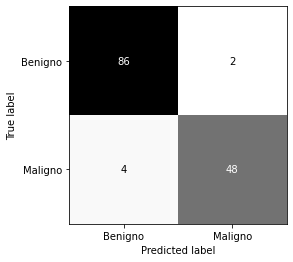

In [12]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classificador, X_test, y_test, colorbar=False, cmap='binary',display_labels = ('Benigno', 'Maligno'))  
plt.show()

**Previsões corretas**

* **Verdadeiros Positivos** (TP = True Positive) = 86. Verdadeiros positivos são os casos em que a classe real era Positiva e o previsto também é Positivo. Neste caso, significa que no conjunto de testes, 86 casos de câncer benigno foram corretamente classificados.

* **Verdadeiros Negativos** (TN = True Negative) = 48. Os verdadeiros negativos são os casos em que a classe real era Falsa e a prevista também é Falsa. Neste caso, significa que no conjunto de testes, 48 casos de câncer maligno foram corretamente classificados.

**Previsões Incorretas**

* **Falsos Positivos** (FP = False Positive) = 4. Falsos positivos são os casos em que a classe real era Falsa, mas foi previsto Positivo. A palavra **Falsos** indica que o modelo previu incorretamente, enquanto **Positivos** porque a classe previu ser positivo. Aqui significa que no conjunto de testes, 4 casos de Câncer Maligno (classe negativa) foram incorretamente classificados como Benigno (Classe Positiva).

* **Falsos Negativos** (FN = False Negative) = 2. Falsos negativos são os casos em que a classe real Positiva, mas foi previsto é Falso. A palavra **Falsos** indica que o modelo previu incorretamente e **Negativos** porque a classe previu ser negativo. Aqui significa que apenas 2 casos de câncer benigno foram incorretamente classificado como maligno.

Essa matriz é muito útil para avaliação de seu modelo, por duas razões principais: 1) porque os dados dela descrevem o resultado da classificação de cada registro; e 2) porque é a por meio dela que obtemos as demais métricas, conforme será detalhado na sequência.



## Acurácia 

É o indicador mais simples de se calcular. É uma métrica que nos mostra a fração de previsões feitas corretamente, de acordo com:  $AC = \frac{TP+TN}{TP+TN+FP+FN}$, em que $AC$ indica a Acurácia do modelo. Iniciamente, vamos importar o método ``accuracy_score``.

In [13]:
from sklearn.metrics import accuracy_score

 Podemos calcular a precisão de três maneiras: Na primeira usando o método ``accuracy_score()``:

In [14]:
accuracy_score(y_true= y_test, y_pred= y_pred)

0.9571428571428572

Enquanto na segunda utilizando o método ``score()``:

In [15]:
classificador.score(X_test, y_test)

0.9571428571428572

Na terceira, apenas para confirmar: $AC = \frac{TP+TN}{TP+TN+FP+FN}$

In [16]:
(86+48)/(86+48+4+2)

0.9571428571428572

Podemos observar, portanto, uma acurácia de 95,71%, ou seja 95,71% de nossas previsões estão corretas.

Embora seja uma métrica de fácil interpretação, a acurácia não é, necessariamente, a melhor métrica. Ela não nos dá informações suficientes sobre as instâncias em que o classificador errou. E, ainda, embora possamos pensar que uma acurácia de 90% seja boa, isso não é necessariamente verdadeiro quandos os dados estão desbalanceados. Digamos que uma classe A componha 90% dos dados, enquanto uma classe B apenas 10%. Um classificador "ingênuo" que classificou todas as amostras do dataset como classe A teria uma  acurácia de 90%. 

Na sequência vamos discutir outras métricas que atacam esse problema e nos trazem outros insights sobre o classificador em análise


## Precisão

É utilizada para indicar a relação entre as previsões corretamente classificadas como positivas dentre todas as previsões positivas feitas pelo modelo. Respondendo à seguinte pergunta: de todas as amostras classificadas como positivas (malígnas), qual percentual foi classificado corretamente?  $PR = \frac{TP}{TP+FP}$, em que $PR$ indica a precisão do modelo. Iniciamente, vamos importar o método ``precision_score``.


In [17]:
from sklearn.metrics import precision_score

In [18]:
precision_score(y_true=y_test, y_pred=y_pred,pos_label=2)

0.9555555555555556

Apenas para confirmar: $PR = \frac{TP}{TP+FP}$

In [19]:
PR=86/(86+4)
print(PR)

0.9555555555555556


## Recall

É utilizada para indicar a relação entre as previsões positivas realizadas corretamente e todas as previsões que realmente são positivas. Respondendo à seguinte pergunta: de todas as amostras positivas (malígnas) na base de dados original, qual percentual é identificado corretamente pelo modelo?  $RE = \frac{TP}{TP+FN}$, em que $RE$ indica a métrica Recall. Iniciamente, vamos importar o método ``recall_score``.


In [20]:
from sklearn.metrics import recall_score

In [21]:
recall_score(y_true=y_test, y_pred=y_pred,pos_label=2)

0.9772727272727273

Apenas para confirmar: $RE = \frac{TP}{TP+FN}$

In [22]:
RE=86/(86+2)
print(RE)

0.9772727272727273


## F1 Score
Precisão e recall também podem ser combinados em uma única métrica chamada F1 Score. A pontuação da F1 é a média harmônica de precisão e recall, isto é quando os dois valores do cálculo são iguais, essa média gera resultados muito próximos da média “comum”. No entanto, sempre que os valores são diferentes, essa média se aproxima mais dos valores menores. $F1 = \frac{2*PR*RE}{PR+RE}$, em que $F1$ indica a métrica F1 Score. Iniciamente, vamos importar o método ``f1_score``.

In [23]:
from sklearn.metrics import f1_score

In [24]:
f1_score(y_true=y_test, y_pred=y_pred,pos_label=2)

0.9662921348314608

Apenas para confirmar: $F1 = \frac{2*PR*RE}{PR+RE}$

In [25]:
F1=2*PR*RE/(PR+RE)
print(F1)

0.9662921348314608


<hr>

## Direitos Autorais

[APL Data Intelligence](https://linktr.ee/APLdataintelligence)&#8482;  2021. Este notebook Python e seu código fonte estão liberados sob os termos da [Licença do MIT](https://bigdatauniversity.com/mit-license/).